In [2]:
import datasets
import json
from glob import glob
center = []
for file in glob("custom_data/center/*.txt"):
    with open(file, "r") as f:
        center.append(json.load(f))
left = []
for file in glob("custom_data/left/*.txt"):
    with open(file, "r") as f:
        left.append(f.read())
right = []
for file in glob("custom_data/right/*.txt"):
    with open(file, "r") as f:
        right.append(f.read())

/home/jxl/anaconda3/envs/hf-latest/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
documents = {"texts": [], "titles": [], "labels": []}
for c in center:
    documents["texts"].append(c)
    documents["labels"].append("center")
for c in left:
    documents["texts"].append(c)
    documents["labels"].append("left")
for c in right:
    documents["texts"].append(c)
    documents["labels"].append("right")

In [5]:
d = datasets.Dataset.from_dict(documents)

In [7]:
d = d.train_test_split(test_size=0.1)
d

DatasetDict({
    train: Dataset({
        features: ['texts', 'labels'],
        num_rows: 15625
    })
    test: Dataset({
        features: ['texts', 'labels'],
        num_rows: 1737
    })
})

In [10]:
def strip_text(r):
    r["texts"] = r["texts"].strip()
    return r
d1 = d.map(strip_text)

100%|██████████| 1737/1737 [00:00<00:00, 17925.48ex/s]


DatasetDict({
    train: Dataset({
        features: ['texts', 'labels'],
        num_rows: 15625
    })
    test: Dataset({
        features: ['texts', 'labels'],
        num_rows: 1737
    })
})

In [12]:
lens = []
for text in d1["train"]["texts"]:
    lens.append(len(text))

In [29]:
d1.save_to_disk("./AllSides/hf_dataset")

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

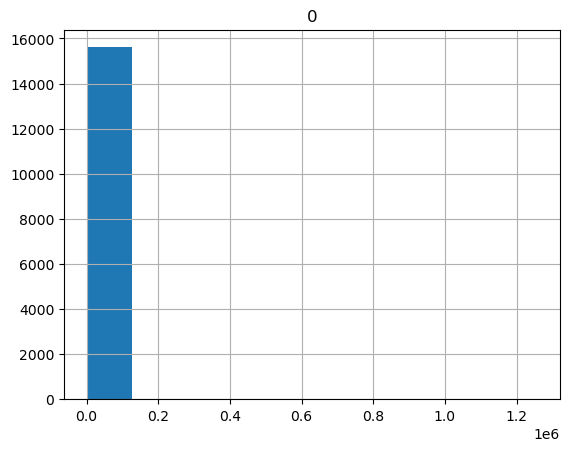

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(lens).hist(column=0)